In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from math import ceil
import seaborn as sns
import plotly.express as px

In [2]:
#Define paths 

csv_path = os.path.abspath(
    os.path.join("..", "data", "processed", "05_-_Antioquia_2021_processed.csv")
)

geo_csv_path = os.path.abspath(
    os.path.join("..", "data", "external", "geo_refs.csv")
)


In [3]:
# Read Csv
df = pd.read_csv(csv_path)
df.head()

,a_o,tipoatencion,numeroatenciones,codigo_departamento,nombre_departamento,codigo_municipio,nombre_municipio,codigo_diagnostico,n_diagnostico
0,2021,CONSULTAS,1,5,Antioquia,5501,Olaya,E02X,HIPOTIROIDISMO SUBCLINICO POR DEFICIENCIA DE YODO
1,2021,CONSULTAS,1,5,Antioquia,5501,Olaya,F069,TRASTORNO MENTAL NO ESPECIFICADO DEBIDO A LESI...
2,2021,CONSULTAS,1,5,Antioquia,5501,Olaya,F412,TRASTORNO MIXTO DE ANSIEDAD Y DEPRESION
3,2021,CONSULTAS,1,5,Antioquia,5501,Olaya,F510,INSOMNIO NO ORGANICO
4,2021,CONSULTAS,1,5,Antioquia,5501,Olaya,F529,"DISFUNCION SEXUAL, NO OCASIONADA POR TRASTORNO..."


In [4]:
print(df.shape)
df.info()

(278274, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278274 entries, 0 to 278273
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   a_o                  278274 non-null  int64 
 1   tipoatencion         278274 non-null  object
 2   numeroatenciones     278274 non-null  int64 
 3   codigo_departamento  278274 non-null  int64 
 4   nombre_departamento  278274 non-null  object
 5   codigo_municipio     278274 non-null  int64 
 6   nombre_municipio     278274 non-null  object
 7   codigo_diagnostico   278274 non-null  object
 8   n_diagnostico        278274 non-null  object
dtypes: int64(4), object(5)
memory usage: 19.1+ MB


In [5]:
print((df['codigo_municipio'].nunique()))

126


In [6]:
print((df['codigo_diagnostico'].nunique()))

9489


## Descriptive statistics


In [7]:
# Analyzing numeroatenciones

print(df[['numeroatenciones']].describe())
print(df[['numeroatenciones']].mode())


       numeroatenciones
count      2.782740e+05
mean       7.792001e+01
std        6.585246e+03
min        1.000000e+00
25%        1.000000e+00
50%        3.000000e+00
75%        9.000000e+00
max        3.252558e+06
   numeroatenciones
0                 1


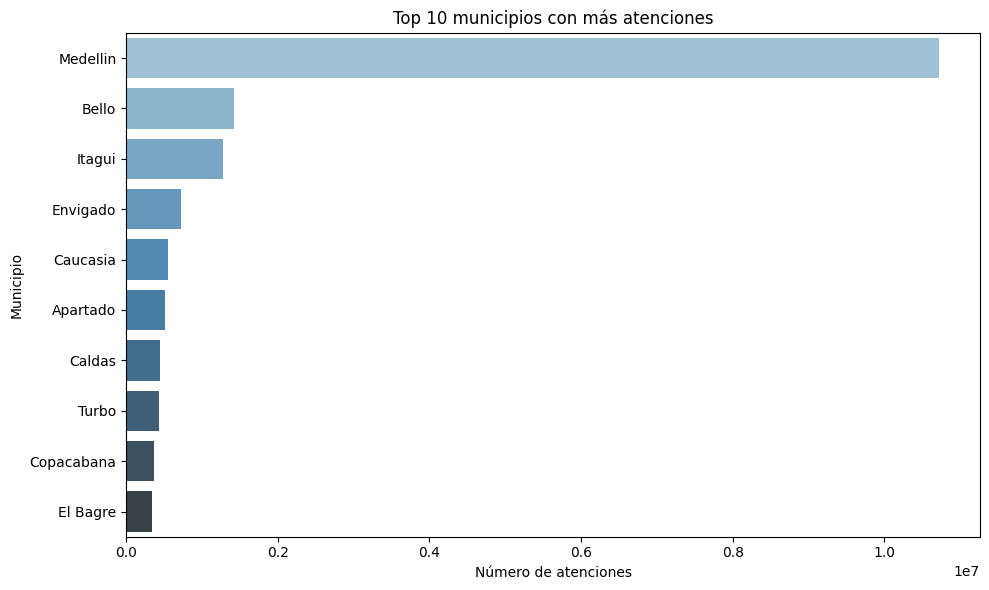

In [8]:
# Top 10 numeroatenciones/nombre_municipio 
municipios = df.groupby('nombre_municipio')['numeroatenciones'].sum().sort_values(ascending=False)
top_municipios = municipios.head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_municipios.values, y=top_municipios.index, palette='Blues_d')
plt.title('Top 10 municipios con más atenciones')
plt.xlabel('Número de atenciones')
plt.ylabel('Municipio')
plt.tight_layout()
plt.show()

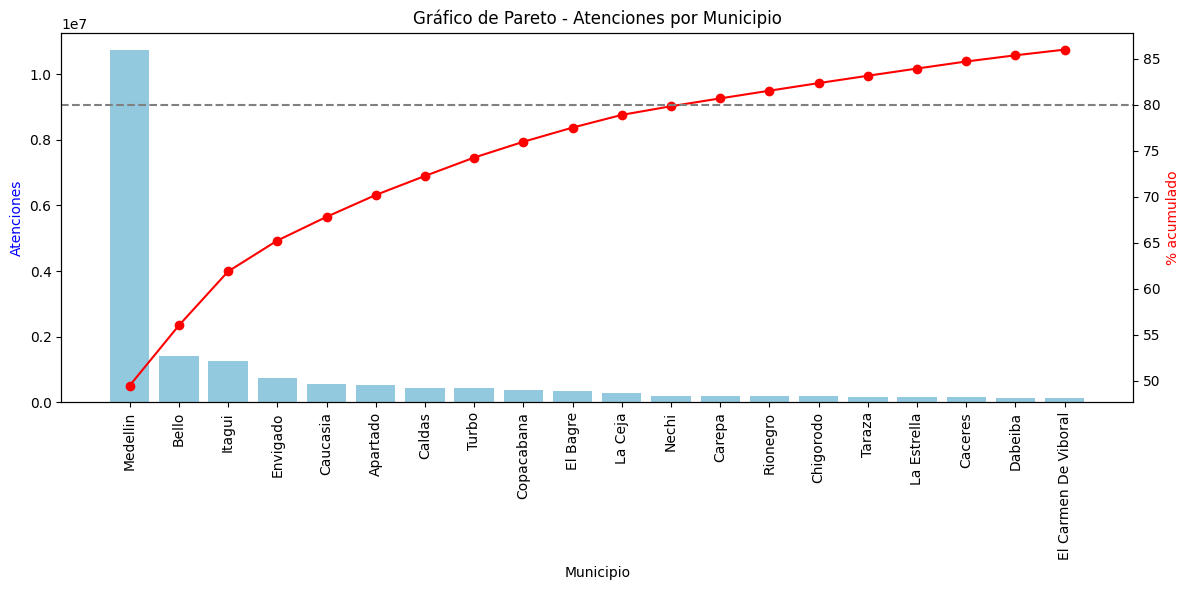

In [9]:
# Accumulate percentage
pareto = municipios.reset_index()
pareto.columns = ['Municipio', 'Atenciones']
pareto['% acumulado'] = pareto['Atenciones'].cumsum() / pareto['Atenciones'].sum() * 100

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x='Municipio', y='Atenciones', data=pareto.head(20), ax=ax1, color='skyblue')
ax1.set_ylabel('Atenciones', color='blue')
ax1.tick_params(axis='x', rotation=90)

# Accumulate line
ax2 = ax1.twinx()
ax2.plot(pareto['Municipio'].head(20), pareto['% acumulado'].head(20), color='red', marker='o')
ax2.set_ylabel('% acumulado', color='red')
ax2.axhline(80, color='gray', linestyle='--')

plt.title('Gráfico de Pareto - Atenciones por Municipio')
plt.tight_layout()
plt.show()


In [10]:

12*100/126

9.523809523809524

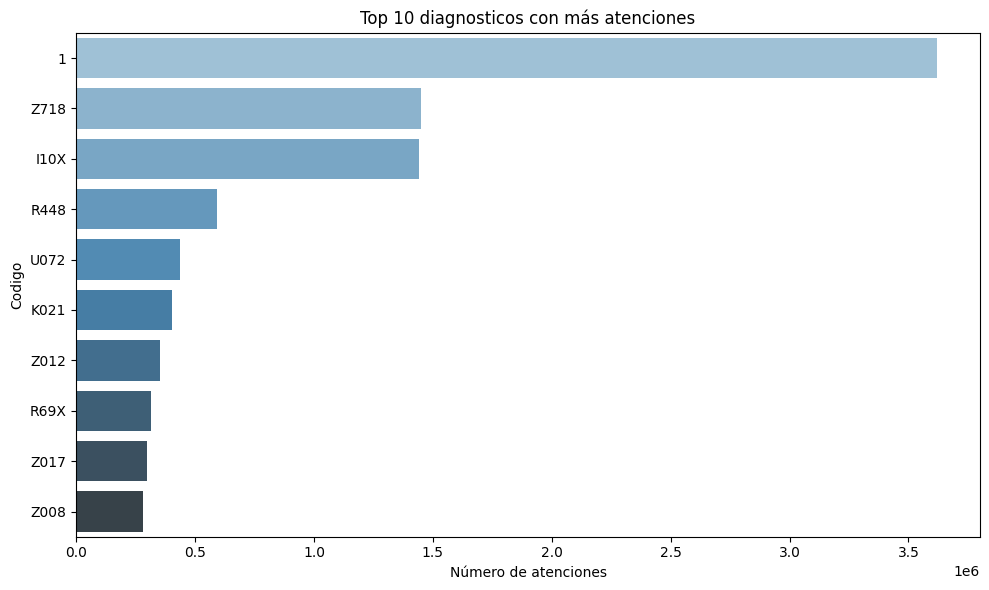

In [11]:
# Top 10 numeroatenciones/nombre_municipio 
diagnosticos = df.groupby('codigo_diagnostico')['numeroatenciones'].sum().sort_values(ascending=False)
top_diagnosticos = diagnosticos.head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_diagnosticos.values, y=top_diagnosticos.index, palette='Blues_d')
plt.title('Top 10 diagnosticos con más atenciones')
plt.xlabel('Número de atenciones')
plt.ylabel('Codigo')
plt.tight_layout()
plt.show()

In [12]:
df.loc[df['codigo_diagnostico'] == '1']

,a_o,tipoatencion,numeroatenciones,codigo_departamento,nombre_departamento,codigo_municipio,nombre_municipio,codigo_diagnostico,n_diagnostico
5068,2021,PROCEDIMIENTOS DE SALUD,2226,5,Antioquia,5321,Guatape,1,NO DEFINIDO
5839,2021,PROCEDIMIENTOS DE SALUD,22112,5,Antioquia,5129,Caldas,1,NO DEFINIDO
10282,2021,PROCEDIMIENTOS DE SALUD,1329,5,Antioquia,5093,Betulia,1,NO DEFINIDO
12908,2021,PROCEDIMIENTOS DE SALUD,27592,5,Antioquia,5376,La Ceja,1,NO DEFINIDO
22635,2021,PROCEDIMIENTOS DE SALUD,3363,5,Antioquia,5674,San Vicente,1,NO DEFINIDO
...,...,...,...,...,...,...,...,...,...
269272,2021,PROCEDIMIENTOS DE SALUD,3671,5,Antioquia,5051,Arboletes,1,NO DEFINIDO
274865,2021,PROCEDIMIENTOS DE SALUD,349,5,Antioquia,5004,Abriaqui,1,NO DEFINIDO
275017,2021,PROCEDIMIENTOS DE SALUD,3571,5,Antioquia,5002,Abejorral,1,NO DEFINIDO
275319,2021,PROCEDIMIENTOS DE SALUD,2394,5,Antioquia,5059,Armenia,1,NO DEFINIDO


In [13]:
no_define = df.loc[df['codigo_diagnostico'] == '1'].groupby('codigo_municipio').size()
print(no_define)

codigo_municipio
5001    1
5002    1
5004    1
5034    1
5036    1
       ..
5858    1
5861    1
5873    1
5885    1
5895    1
Length: 75, dtype: int64


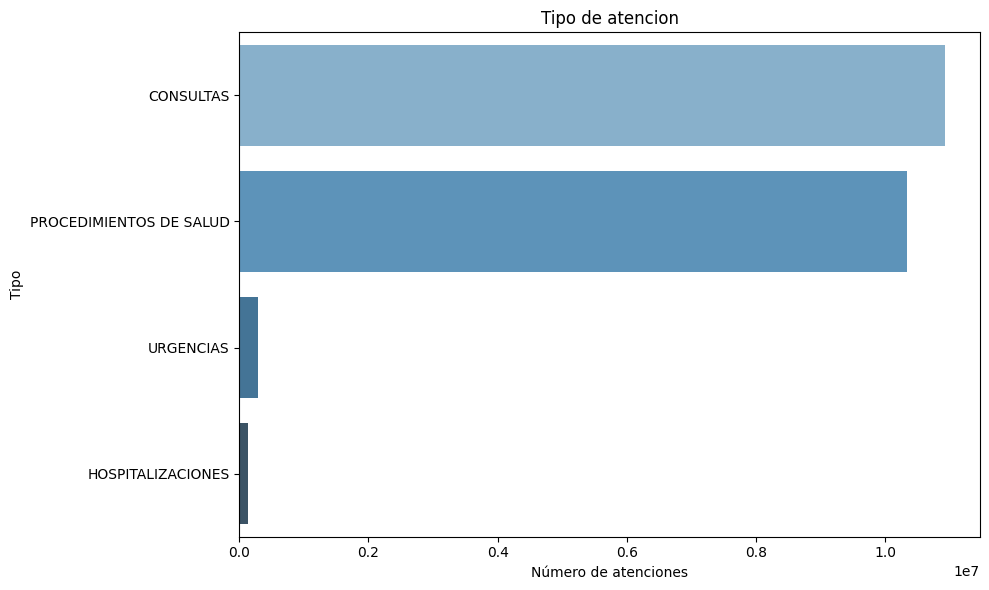

In [14]:
tipoatencion = df.groupby('tipoatencion')['numeroatenciones'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=tipoatencion.values, y=tipoatencion.index, palette='Blues_d')
plt.title('Tipo de atencion')
plt.xlabel('Número de atenciones')
plt.ylabel('Tipo')
plt.tight_layout()
plt.show()

In [15]:
df['tipoatencion'].value_counts(normalize=True)


CONSULTAS                  0.498861
PROCEDIMIENTOS DE SALUD    0.304470
URGENCIAS                  0.105457
HOSPITALIZACIONES          0.091212
Name: tipoatencion, dtype: float64

In [16]:
cie10_table = {
    'A': 'I - Enfermedades infecciosas y parasitarias',
    'B': 'I - Enfermedades infecciosas y parasitarias',
    'C': 'II - Neoplasias',
    'D': 'III - Enfermedades sangre / inmunidad',  
    'E': 'IV - Endocrinas, nutricionales y metabólicas',
    'F': 'V - Mentales y de comportamiento',
    'G': 'VI - Sistema nervioso',
    'H': 'VII-VIII - Ojo / Oreja',
    'I': 'IX - Sistema circulatorio',
    'J': 'X - Sistema respiratorio',
    'K': 'XI - Sistema digestivo',
    'L': 'XII - Piel y tejido subcutáneo',
    'M': 'XIII - Sistema musculoesquelético',
    'N': 'XIV - Aparato genitourinario',
    'O': 'XV - Embarazo y puerperio',
    'P': 'XVI - Perinatal',
    'Q': 'XVII - Malformaciones congénitas',
    'R': 'XVIII - Signos y síntomas',
    'S': 'XIX - Lesiones y otras causas externas',
    'T': 'XIX - Lesiones y otras causas externas',
    'V': 'XX - Causas externas de morbilidad y mortalidad',
    'W': 'XX - Causas externas de morbilidad y mortalidad',
    'X': 'XX - Causas externas de morbilidad y mortalidad',
    'Y': 'XXI - Causas externas de morbilidad y mortalidad',
    'Z': 'XXII - Factores sociales y contacto con salud',
}


In [17]:
df['capitulo'] = df['codigo_diagnostico'].str[0].map(cie10_table)
count_cie = df['capitulo'].value_counts().sort_values(ascending=True)
print(count_cie)


XXI - Causas externas de morbilidad y mortalidad     2141
XVI - Perinatal                                      3337
XX - Causas externas de morbilidad y mortalidad      4434
XVII - Malformaciones congénitas                     7050
VI - Sistema nervioso                                8972
X - Sistema respiratorio                            10003
I - Enfermedades infecciosas y parasitarias         10354
II - Neoplasias                                     10789
IV - Endocrinas, nutricionales y metabólicas        11274
III - Enfermedades sangre / inmunidad               11450
XII - Piel y tejido subcutáneo                      11756
V - Mentales y de comportamiento                    12979
XV - Embarazo y puerperio                           13002
IX - Sistema circulatorio                           14540
VII-VIII - Ojo / Oreja                              14777
XXII - Factores sociales y contacto con salud       16749
XVIII - Signos y síntomas                           16799
XIV - Aparato 

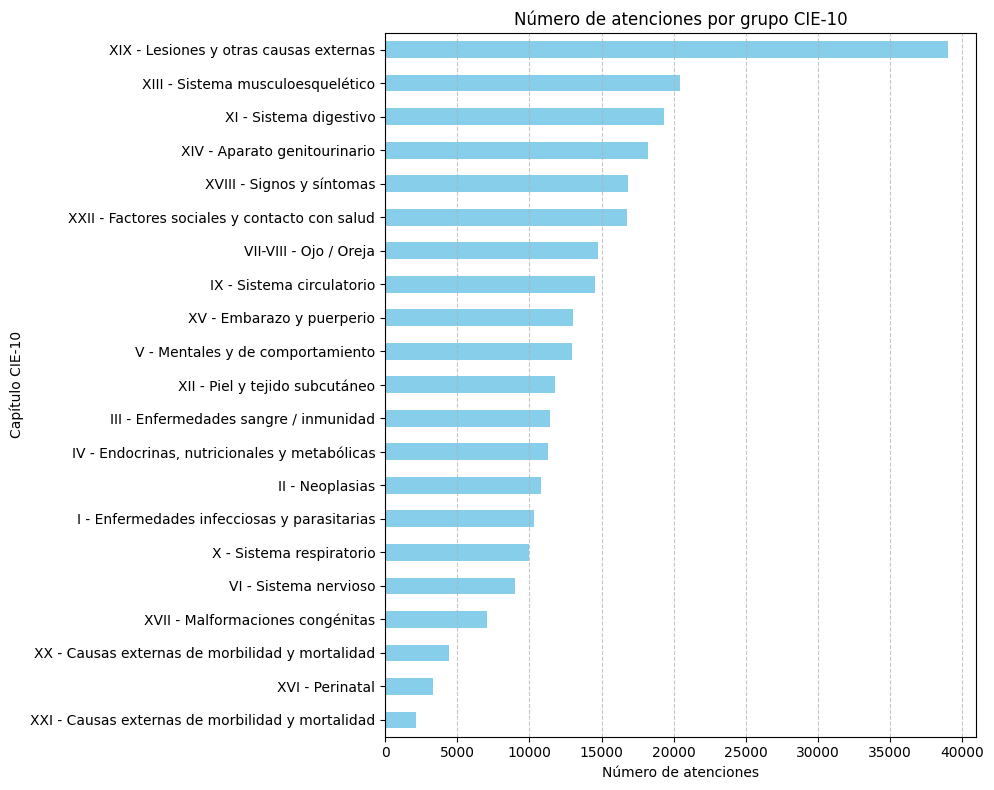

In [18]:
plt.figure(figsize=(10, 8))
count_cie.plot(kind='barh', color='skyblue')
plt.title('Número de atenciones por grupo CIE-10')
plt.xlabel('Número de atenciones')
plt.ylabel('Capítulo CIE-10')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [19]:
# Read Csv
df_geo = pd.read_csv(geo_csv_path)
df_geo.head()

,cod_dpto,nom_dpto,cod_mpio,nom_mpio,tipo,latitud,longitud,geo_municipio
0,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,6.257590,-75.611031,"{'type': 'Point', 'coordinates': [-75.61103107..."
1,5,ANTIOQUIA,5002,ABEJORRAL,Municipio,5.803728,-75.438474,"{'type': 'Point', 'coordinates': [-75.43847353..."
2,5,ANTIOQUIA,5004,ABRIAQUÍ,Municipio,6.627569,-76.085978,"{'type': 'Point', 'coordinates': [-76.08597756..."
3,5,ANTIOQUIA,5021,ALEJANDRÍA,Municipio,6.365534,-75.090597,"{'type': 'Point', 'coordinates': [-75.09059702..."
4,5,ANTIOQUIA,5030,AMAGÁ,Municipio,6.032922,-75.708003,"{'type': 'Point', 'coordinates': [-75.7080031,..."


In [20]:
df_geo['cod_mpio'] = df_geo['cod_mpio'].astype(str).str.zfill(5)
df_geo.rename(columns={'cod_mpio': 'codigo_municipio'}, inplace=True)

df['codigo_municipio'] = df['codigo_municipio'].astype(str).str.zfill(5)

In [21]:
df_agg = df.groupby('codigo_municipio', as_index=False).agg({
    'numeroatenciones': 'sum'  # O el nombre que tenga tu columna de conteo
})
df_map = pd.merge(df_agg, df_geo, on='codigo_municipio', how='inner')
df_map.head()

,codigo_municipio,numeroatenciones,cod_dpto,nom_dpto,nom_mpio,tipo,latitud,longitud,geo_municipio
0,05001,10726430,5,ANTIOQUIA,MEDELLÍN,Municipio,6.257590,-75.611031,"{'type': 'Point', 'coordinates': [-75.61103107..."
1,05002,30516,5,ANTIOQUIA,ABEJORRAL,Municipio,5.803728,-75.438474,"{'type': 'Point', 'coordinates': [-75.43847353..."
2,05004,1447,5,ANTIOQUIA,ABRIAQUÍ,Municipio,6.627569,-76.085978,"{'type': 'Point', 'coordinates': [-76.08597756..."
3,05021,3273,5,ANTIOQUIA,ALEJANDRÍA,Municipio,6.365534,-75.090597,"{'type': 'Point', 'coordinates': [-75.09059702..."
4,05030,63585,5,ANTIOQUIA,AMAGÁ,Municipio,6.032922,-75.708003,"{'type': 'Point', 'coordinates': [-75.7080031,..."


In [61]:
min_size = 15
max_size = 50

df_map["size_normalized"] = df_map["numeroatenciones"].apply(
    lambda x: min_size + (max_size - min_size) * (x - df_map["numeroatenciones"].min()) / (df_map["numeroatenciones"].max() - df_map["numeroatenciones"].min())
)

fig = px.scatter_mapbox(
    df_map,
    lat="latitud",
    lon="longitud",
    size="size_normalized",
    hover_name="nom_mpio",
    hover_data=["numeroatenciones"],
    color="numeroatenciones",
    color_continuous_scale="spectral",
    zoom=6.2,
    height=600,
    mapbox_style="carto-positron",
    title="Atenciones médicas por municipio (tamaño normalizado)"
)
fig.show()
